In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
sns.set(style="whitegrid")

In [6]:
df = pd.read_csv('Entrenamieto_ECI_2020.csv')

In [7]:
#Filtro oportunidades a analizar, Exitosas y No Exitosas
df = df.loc[(df['Stage']!='Proposal') & (df['Stage']!='Negotiation') & (df['Stage']!='Qualification'),:]

In [8]:
# Para los casos en que tenga a Japon como Region y a None como Territory le asigno Japón a Territory, sinó lo dejo como está
df['Territory'] = df.apply(lambda row: row['Region'] if ((row['Territory']=='None') & (row['Region']=='Japan')) else row['Territory'],axis=1)

In [9]:
# Dejo Japón solo como territorio y como Región le asigno APAC (Asia-Pacífico)
df.loc[df['Region']=='Japan','Region']='Asia-Pacífico'

In [10]:
# Cambio el nombre de la región Americas por América
df.loc[df['Region']=='Americas','Region']='América'
# Cambio el nombre de la región EMEA por Europa, Oriente Medio y África
df.loc[df['Region']=='EMEA','Region']='Europa'
df.loc[df['Region']=='Middle East','Region']='Oriente Medio'
df.loc[df['Region']=='APAC','Region']='Asia-Pacífico'

In [11]:
df.Region.value_counts()

Asia-Pacífico    8120
Europa           4660
América          3933
Oriente Medio     170
Name: Region, dtype: int64

In [12]:
df.loc[df['Territory']=='Saudi Arabia','Territory']= 'Arabia Saudita'
df.loc[df['Territory']=='KSA','Territory']= 'Arabia Saudita'

In [13]:
## Arreglamos la asignación de los territorios a sus correspondientes Regiones

In [14]:
df.loc[(df['Territory']=='Arabia Saudita')|(df['Territory']=='Jordan')|(df['Territory']=='UAE (Dubai)')\
       |(df['Territory']=='Egypt')|(df['Territory']=='Kuwait'),'Region']= 'Oriente Medio'

In [15]:
df.loc[(df['Territory']=='South America')|(df['Territory']=='SE America')|(df['Territory']=='SW America')\
       |(df['Territory']=='Central America'),'Region']= 'América'

In [16]:
df.loc[df['Territory']=='Kazakhstan','Region']= 'Asia-Pacífico'

In [17]:
# Voy a Clasificar los Territorios según los Hemisferios para luego calcular las estaciones del
# año según dicha hubicación
mis_kw = df['Territory']

from flashtext import KeywordProcessor
keyword_processor = KeywordProcessor()
keyword_dict = {"Hemisferio Norte": ["NW America","Japan", "India","Italy","Germany","United Kingdom","UAE (Dubai)","Greece"\
                                     ,"Switzerland","Austria","NE America","Belgium","Tunisia",'SE America',"France","Spain","Singapore"\
                                     ,"Philippines","SW America",'Denmark', 'Central America', 'Poland', 'Norway', 'Thailand'\
                                     ,'Portugal', 'South Korea','Netherlands','Kuwait','Arabia Saudita','Cambodia', 'China (PRC)', 'KSA', 'Ireland'\
                                     , 'Jordan','Cyprus', 'Morocco', 'Turkey', 'Sweden', 'Monaco', 'Kazakhstan','Romania', 'Hungary'\
                                     , 'Taiwan','Macedonia', 'Ukraine', 'Czech Republic', 'Belarus','Vietnam', 'Saudi Arabia'\
                                     ,'Bosnia & Herzegovina', 'Kosovo', 'Luxembourg', 'Bulgaria','UAE (Others)', 'Armenia', 'Croatia'\
                                     , 'Malaysia', 'Georgia','Estonia', 'Pakistan', 'Canada', 'Central US', 'Carribean','Malta'\
                                     , 'Albania', 'Oman', 'Burma', 'Slovenia','Egypt']\
               ,"Hemisferio Sur": ["Australia",'South America','Indonesia','South East Asia','Solomon Islands','New Zealand']\
             }
key_depuradas=[]
keyword_processor.add_keywords_from_dict(keyword_dict)
for w in mis_kw:
       if len(keyword_processor.extract_keywords(w))==1:
            key_depuradas.append(keyword_processor.extract_keywords(w)[0])
       
       else: 
            key_depuradas.append(w)

In [18]:
len(key_depuradas)

16883

In [19]:
len(df['Territory'])

16883

In [20]:
df['Hemisferio'] = key_depuradas

In [21]:
#Filtro los emisferios para los cuales no tenía un territorio definido
df = df.loc[(df['Hemisferio']!='None'),:]

In [22]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Hemisferio
2,27446,América,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,Hemisferio Norte
3,16808,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,Hemisferio Norte
4,16805,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,Hemisferio Norte
5,16802,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2018,NaT,28,USD,14838277.5,USD,14838277.5,Closed Lost,Prod_Category_A_None,Hemisferio Norte
6,16799,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,2017,NaT,7,USD,2659494.6,USD,2659494.6,Closed Lost,Prod_Category_A_None,Hemisferio Norte


In [23]:
df.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16095 entries, 2 to 16946
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  16095 non-null  int64  
 1   Region                              16095 non-null  object 
 2   Territory                           16095 non-null  object 
 3   Pricing, Delivery_Terms_Quote_Appr  16095 non-null  int64  
 4   Pricing, Delivery_Terms_Approved    16095 non-null  int64  
 5   Bureaucratic_Code_0_Approval        16095 non-null  int64  
 6   Bureaucratic_Code_0_Approved        16095 non-null  int64  
 7   Submitted_for_Approval              16095 non-null  int64  
 8   Bureaucratic_Code                   16095 non-null  object 
 9   Account_Created_Date                16095 non-null  object 
 10  Source                              16095 non-null  object 
 11  Billing_Country                     16095

In [25]:
#Me quedo con algunas columnas que voy a graficar
df=df[['ID','Opportunity_ID', 'Region', 'Territory','Opportunity_Created_Date','Hemisferio','TRF','Stage']]

In [26]:
df['Opportunity_Created_Date']=pd.to_datetime(df['Opportunity_Created_Date'])

In [27]:
df.sample(15)

,ID,Opportunity_ID,Region,Territory,Opportunity_Created_Date,Hemisferio,TRF,Stage
4273,20792,2481,Europa,Spain,2016-09-13,Hemisferio Norte,0,Closed Won
11935,11043,7296,Asia-Pacífico,Singapore,2018-01-03,Hemisferio Norte,0,Closed Lost
16388,28311,12538,Asia-Pacífico,India,2015-08-21,Hemisferio Norte,0,Closed Won
1354,5406,786,Asia-Pacífico,India,2017-02-14,Hemisferio Norte,2,Closed Lost
13225,18414,8046,Europa,Germany,2018-04-25,Hemisferio Norte,0,Closed Won
10967,6309,6758,Asia-Pacífico,Japan,2017-11-29,Hemisferio Norte,0,Closed Won
5883,6123,3613,Europa,Italy,2017-03-16,Hemisferio Norte,0,Closed Won
3484,20855,1938,Europa,Germany,2016-06-30,Hemisferio Norte,14,Closed Lost
5347,10537,3208,Europa,Netherlands,2016-12-05,Hemisferio Norte,2,Closed Won
4063,12504,2317,Europa,France,2016-08-19,Hemisferio Norte,11,Closed Lost


In [28]:
def encuentra_Estacion_N(date): 
    year = str(date.year)
    seasons = {'Primavera': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Verano': pd.date_range(start='21/06/'+year, end='20/09/'+year),
               'Otoño': pd.date_range(start='21/09/'+year, end='20/12/'+year)}
    if date in seasons['Primavera']:
        return 'Primavera'
    if date in seasons['Verano']:
        return 'Verano'
    if date in seasons['Otoño']:
        return 'Otoño'
    else:
        return 'Invierno'    

In [29]:
def encuentra_Estacion_S(date): 
    year = str(date.year)
    seasons = {'Otoño': pd.date_range(start='21/03/'+year, end='20/06/'+year),
               'Invierno': pd.date_range(start='21/06/'+year, end='20/09/'+year),
               'Primavera': pd.date_range(start='21/09/'+year, end='20/12/'+year)}
    if date in seasons['Invierno']:
        return 'Invierno'
    if date in seasons['Primavera']:
        return 'Primavera'
    if date in seasons['Otoño']:
        return 'Otoño'
    else:
        return 'Verano' 

In [30]:
df.loc[df['Hemisferio']=='Hemisferio Norte','Estación'] = df.loc[df['Hemisferio']=='Hemisferio Norte','Opportunity_Created_Date']\
.map(encuentra_Estacion_N)

In [31]:
df.loc[df['Hemisferio']=='Hemisferio Sur','Estación'] = df.loc[df['Hemisferio']=='Hemisferio Sur','Opportunity_Created_Date']\
.map(encuentra_Estacion_S)

In [32]:
df.Estación.value_counts(normalize=True)

Primavera    0.269711
Otoño        0.265424
Verano       0.234980
Invierno     0.229885
Name: Estación, dtype: float64

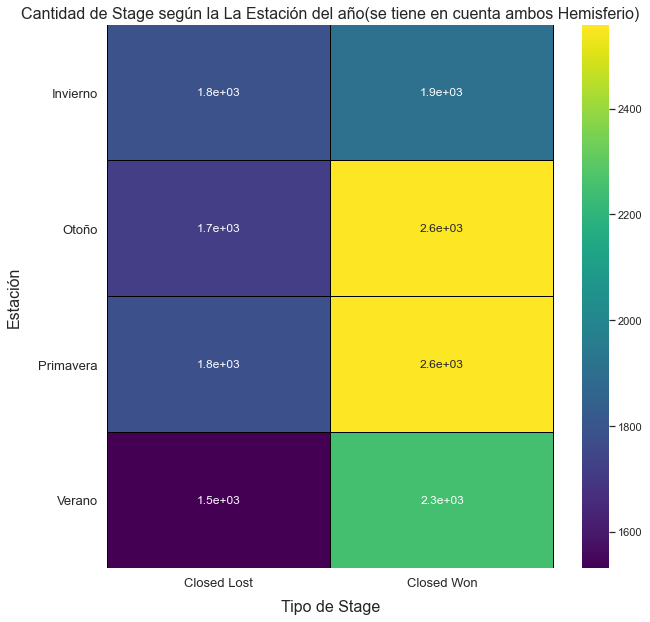

In [33]:
df['veces'] = 1
mi_map=pd.crosstab(df['Estación'], df['Stage'],values=df.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según la La Estación del año(se tiene en cuenta ambos Hemisferio)", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Estación", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

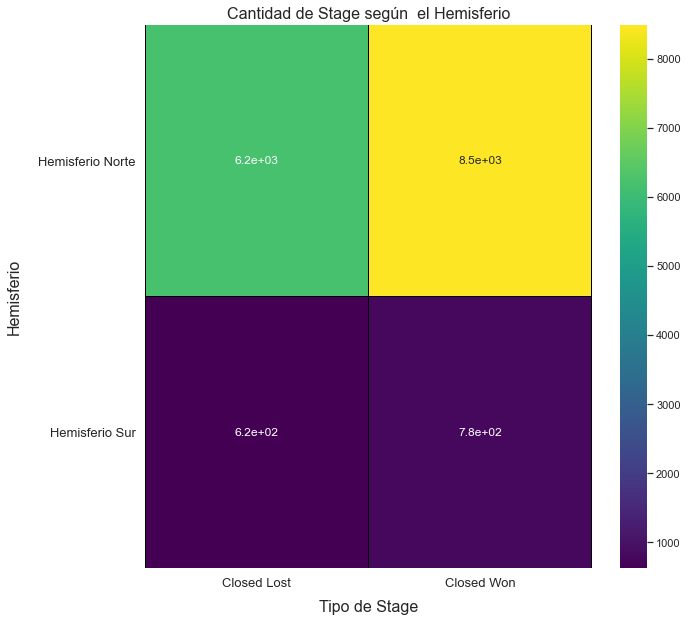

In [34]:
df['veces'] = 1
mi_map=pd.crosstab(df['Hemisferio'], df['Stage'],values=df.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según  el Hemisferio", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Hemisferio", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

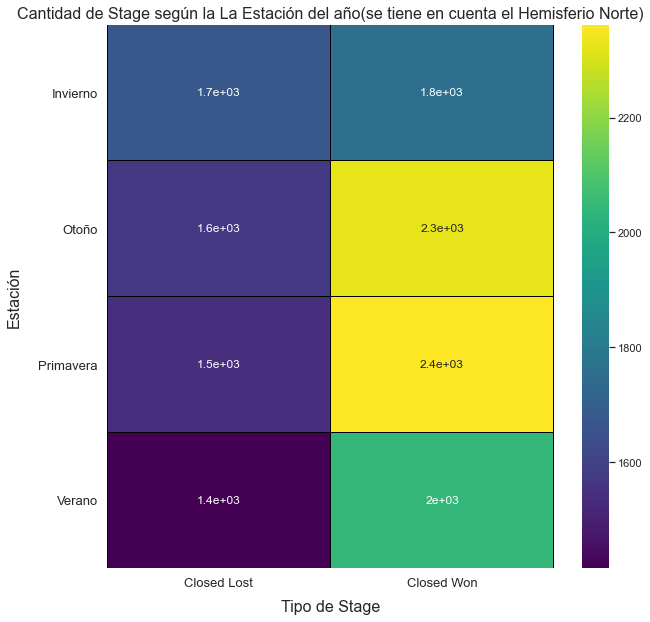

In [35]:
df['veces'] = 1
mi_map=pd.crosstab(df.loc[df['Hemisferio']=='Hemisferio Norte','Estación'], df['Stage'],values=df.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según la La Estación del año(se tiene en cuenta el Hemisferio Norte)", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Estación", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

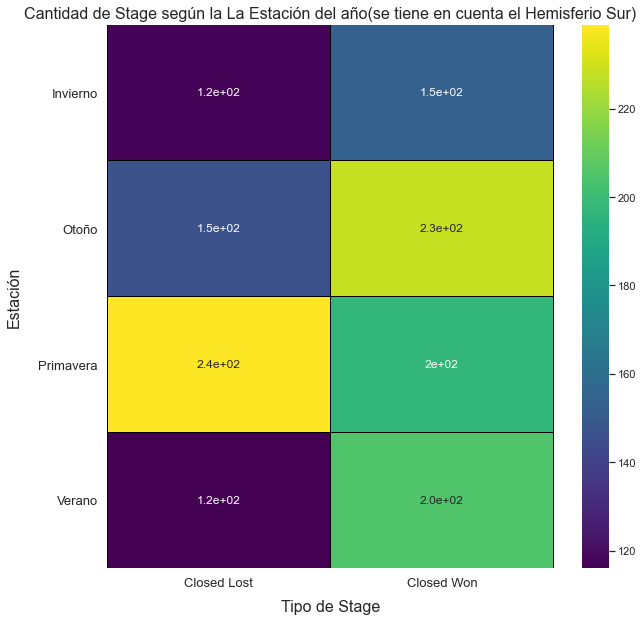

In [36]:
df['veces'] = 1
mi_map=pd.crosstab(df.loc[df['Hemisferio']=='Hemisferio Sur','Estación'], df['Stage'],values=df.veces,aggfunc=np.sum)
fig, ax = plt.subplots(figsize=(10,10))
g = sns.heatmap(mi_map, cmap="viridis", ax=ax, linewidths=0.005, linecolor='black',annot=True)
g.set_title("Cantidad de Stage según la La Estación del año(se tiene en cuenta el Hemisferio Sur)", fontsize=16)
g.set_xlabel("Tipo de Stage", fontsize=16, labelpad=10)
g.set_ylabel("Estación", fontsize=16, labelpad=16, rotation=90)
g.set_xticklabels(g.get_xticklabels(), fontsize=13)
g.set_yticklabels(g.get_yticklabels(), fontsize=13, rotation=0)
g.title.set_position([0.5, 1.05])
plt.show()

In [38]:
df.Hemisferio.value_counts()

Hemisferio Norte    14693
Hemisferio Sur       1402
Name: Hemisferio, dtype: int64

In [47]:
df.Region.value_counts().sum()

16095

In [48]:
df.Region.value_counts()

Asia-Pacífico    8127
Europa           4420
América          3391
Oriente Medio     157
Name: Region, dtype: int64

In [57]:
df.groupby(['Region','Estación'], as_index=False)['TRF'].count()

,Region,Estación,TRF
0,América,Invierno,804
1,América,Otoño,924
2,América,Primavera,949
3,América,Verano,714
4,Asia-Pacífico,Invierno,1932
5,Asia-Pacífico,Otoño,2171
6,Asia-Pacífico,Primavera,2107
7,Asia-Pacífico,Verano,1917
8,Europa,Invierno,925
9,Europa,Otoño,1146


In [105]:
df.groupby(['Region','Estación','Stage'], as_index=False)['TRF'].count()

,Region,Estación,Stage,TRF
0,América,Invierno,Closed Lost,471
1,América,Invierno,Closed Won,333
2,América,Otoño,Closed Lost,475
3,América,Otoño,Closed Won,449
4,América,Primavera,Closed Lost,477
5,América,Primavera,Closed Won,472
6,América,Verano,Closed Lost,363
7,América,Verano,Closed Won,351
8,Asia-Pacífico,Invierno,Closed Lost,832
9,Asia-Pacífico,Invierno,Closed Won,1100


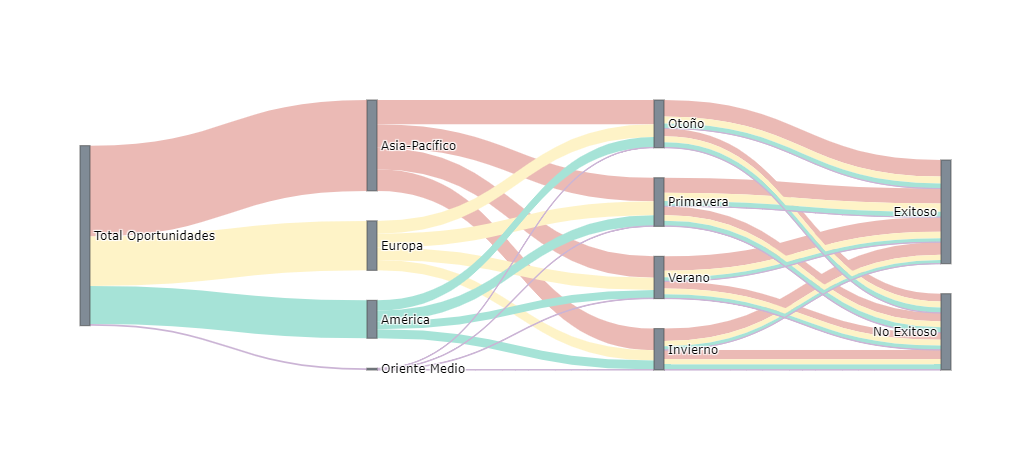

In [130]:
source = [0, 0, 0, 0,       # Total Oportunidades(va hacia 4 regiones osea a los target 1,2,3,4)
          1, 1, 1, 1,       
          2, 2, 2, 2,           
          3, 3, 3, 3,  
          4, 4, 4, 4,
          6, 6,              
          5, 5,
          7, 7,
          8, 8,
          6, 6,              
          5, 5,
          7, 7,
          8, 8,
          6, 6,              
          5, 5,
          7, 7,
          8, 8,
          6, 6,              
          5, 5,
          7, 7,
          8, 8,
         ]          

target = [1, 2, 3, 4, 
          5, 6 ,7, 8, 
          5, 6 ,7, 8,
          5, 6 ,7, 8,
          5, 6 ,7, 8,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,
          9, 10,]

value = [8127, 4420, 3391, 157, 
         1932, 2171, 2107, 1917,
         925,  1146, 1247, 1102,
         804,  924, 949, 714,
         39, 31, 38, 49,
         1486, 685,
         1100, 832,
         1339, 768,
         1294, 623,
         608, 538,
         471, 454,
         742, 505,
         586, 516,
         449, 475,
         333, 471,
         472, 477,
         351, 363,
         12, 19,
         7, 32,
         6, 32,
         20, 29,
        ]

label = ['Total Oportunidades',
         'Asia-Pacífico',
         'Europa', 
         'América',
         'Oriente Medio',
         'Invierno', 
         'Otoño', 
         'Primavera', 
         'Verano',
         'Exitoso',
         'No Exitoso'
         ]

color_node = [
'#808B96', 
'#808B96', '#808B96', '#808B96', '#808B96',
'#808B96', '#808B96', '#808B96', '#808B96',
'#808B96','#808B96']
color_link = [
'#EBBAB5', '#FEF3C7', '#A6E3D7', '#CBB4D5', #Rojo
'#EBBAB5', '#EBBAB5','#EBBAB5', '#EBBAB5',  #Amarillo
'#FEF3C7', '#FEF3C7','#FEF3C7', '#FEF3C7',  #Verde
'#A6E3D7', '#A6E3D7', '#A6E3D7', '#A6E3D7', #Lila
'#CBB4D5', '#CBB4D5','#CBB4D5', '#CBB4D5',
'#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5',
'#EBBAB5', '#EBBAB5',
'#FEF3C7', '#FEF3C7',
'#FEF3C7', '#FEF3C7',
'#FEF3C7', '#FEF3C7',
'#FEF3C7', '#FEF3C7',
'#A6E3D7', '#A6E3D7',
'#A6E3D7', '#A6E3D7',
'#A6E3D7', '#A6E3D7',
'#A6E3D7', '#A6E3D7',
'#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5',
'#CBB4D5', '#CBB4D5',]

# data to dict, dict to sankey
link = dict(source = source, target = target, value = value, color = color_link)
node = dict(label = label, pad=30, thickness=10, color = color_node)
data = go.Sankey(link = link, node=node)
# plot
fig = go.Figure(data)
fig.show()